# Pandas Solutions

In [7]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings('ignore')

fname = '../../data/air_quality_hourly_london_marylebone.csv'

def dateparse(date_str, time_str):
    if time_str == '24:00:00':
        time_str = '00:00:00'
        date = pd.datetime.strptime(date_str + time_str, '%Y-%m-%d%H:%M:%S')
        date = date + datetime.timedelta(days=1)
    else:
        date = pd.datetime.strptime(date_str + time_str, '%Y-%m-%d%H:%M:%S')
    return date 
    #pd.datetime.strptime(date_str + time_str, '%Y-%m-%d%H:%M:%S')

air_quality = pd.read_csv(fname, header=4, skipfooter=4, na_values='No data', engine='python',
              parse_dates={'Time': [0, 1]}, date_parser=dateparse) 


air_quality.columns = ['Time', 'O3', 'O3_status', 'NOx', 'NOx_status',
                       'CO', 'CO_status', 'PM10', 'PM10_status', 'Co', 'Co_status']

air_quality.drop('Co', 1, inplace=True)
air_quality.drop('Co_status', 1, inplace=True)

air_quality.head(4)

,Time,O3,O3_status,NOx,NOx_status,CO,CO_status,PM10,PM10_status
0,2015-01-01 01:00:00,13.70381,V ugm-3,177.01526,V ugm-3,0.375260,V mgm-3,39.3,V ugm-3 (TEOM FDMS)
1,2015-01-01 02:00:00,8.58151,V ugm-3,294.46380,V ugm-3,0.542517,V mgm-3,41.1,V ugm-3 (TEOM FDMS)
2,2015-01-01 03:00:00,9.77893,V ugm-3,209.99537,V ugm-3,0.406306,V mgm-3,35.1,V ugm-3 (TEOM FDMS)
3,2015-01-01 04:00:00,13.96990,V ugm-3,160.89863,V ugm-3,0.281445,V mgm-3,27.6,V ugm-3 (TEOM FDMS)


Q: how to list data entries with negative O3?

In [8]:
air_quality.O3[air_quality.O3.values < 0] 

4100   -0.54882
4101   -0.14968
Name: O3, dtype: float64

Replace negative ozone values with Nan

In [10]:
air_quality.O3[air_quality.O3.values < 0] = np.nan

Saving data to csv:

In [12]:
# air_quality.to_csv("bla-blah.csv", index=False)

# OLR and SOI data
First we need to import pandas and load the datafiles we want to use for the exercise.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
soi_df = pd.read_csv('../../data/soi.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))
olr_df = pd.read_csv('../../data/olr.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))


Now that we have the data I will combine them into a single dataframe, as it was done in the Pandas-Intro notebook.

In [15]:
df = pd.DataFrame({'OLR': olr_df.Value,
                   'SOI': soi_df.Value})
df

,OLR,SOI
Date,,
1951-01-01,NaN,1.5
1951-02-01,NaN,0.9
1951-03-01,NaN,-0.1
1951-04-01,NaN,-0.3
1951-05-01,NaN,-0.7
...,...,...
2016-06-01,0.1,0.6
2016-07-01,0.5,0.4
2016-08-01,0.8,0.7


## Exercise: create a scatter plot

* You can use `df.plot` function with the appropriate keywords
* What happens if you use "c=" keyword?
* Pass another parameter: `edgecolors='none'`

There are two ways, which I will demonstrate:

### First method to create a scatter plot

<AxesSubplot:xlabel='OLR', ylabel='SOI'>

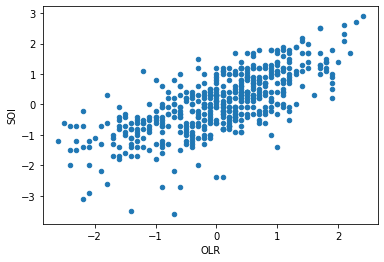

In [16]:
# your code here
# the first way is to define the scatter plot with an argument in .plot()
df.plot(kind = 'scatter', x = 'OLR', y = 'SOI')

Note that I had to specify with further arguments which coloumn of the dataframe is the x-axis, and which coloumn is the y-axis.

We can personalise the scatter plot even further using two of the colour arguments: 'c' and 'edgecolor':

<AxesSubplot:xlabel='OLR', ylabel='SOI'>

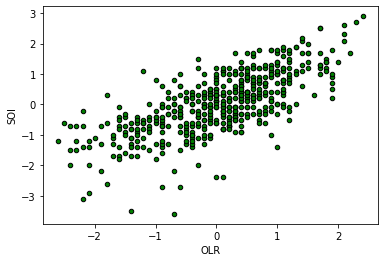

In [17]:
df.plot(kind = 'scatter', x = 'OLR', y = 'SOI', c = 'g', edgecolor = 'k')

As discussed in the teaching notebook, c can take on a range of different kinds of values, for example simple letters or words denoting a colour (e.g. 'g' or 'green') or a third variable with a colourmap (e.g. time). edgecolor defines the color of the edges of the data points, here we chose black, also given by the value 'k'.

### Second method to create a scatter plot

If you prefer to use methods instead of lots of arguments, this works also:

In [19]:
df

,OLR,SOI
Date,,
1951-01-01,NaN,1.5
1951-02-01,NaN,0.9
1951-03-01,NaN,-0.1
1951-04-01,NaN,-0.3
1951-05-01,NaN,-0.7
...,...,...
2016-06-01,0.1,0.6
2016-07-01,0.5,0.4
2016-08-01,0.8,0.7


<AxesSubplot:xlabel='OLR', ylabel='SOI'>

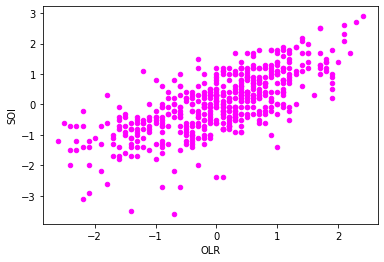

In [32]:
df.plot.scatter(x='OLR', y='SOI', c='magenta')

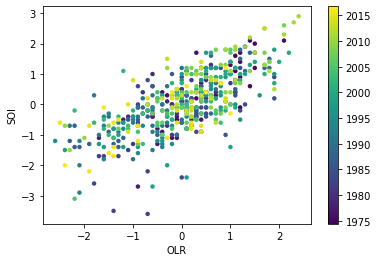

In [36]:
import matplotlib.dates as mdates

mdt = mdates.date2num(df.index)

df['mpl_date'] = mdt

ax = df.plot(kind='scatter', x='OLR', y='SOI', c='mpl_date',
             colormap='viridis', colorbar=False, edgecolors='none')
plt.colorbar(ax.collections[0], ticks=mdates.YearLocator(5), 
             format=mdates.DateFormatter('%Y'))

## Exercise: Rolling Function

**1. Subset data**

* Start by subsetting the SOI `DataFrame`
* Use either numerical indices, or, even better, datetime indices

Now to create the subset: say I want to specifically look at the SOI data over the decade 1975-1985:

In [37]:
# your code here
subset = df['SOI']['1975-01-01':'1985-01-01'] # I selected SOI specifically and used strings to denote the date range in the index.
subset

Date
1975-01-01   -0.5
1975-02-01    0.8
1975-03-01    1.6
1975-04-01    1.2
1975-05-01    0.6
             ... 
1984-09-01    0.1
1984-10-01   -0.3
1984-11-01    0.3
1984-12-01   -0.1
1985-01-01   -0.3
Freq: MS, Name: SOI, Length: 121, dtype: float64

In [38]:
# let's get an overview of the decade 
subset.describe()

count    121.000000
mean      -0.024793
std        1.044612
min       -3.600000
25%       -0.400000
50%        0.000000
75%        0.600000
max        2.100000
Name: SOI, dtype: float64

**2. Plot the subset data**

* You can create figure and axis using `matplotlib.pyplot`
* Or just use the `plot()` method of pandas `DataFrame`

<AxesSubplot:xlabel='Date'>

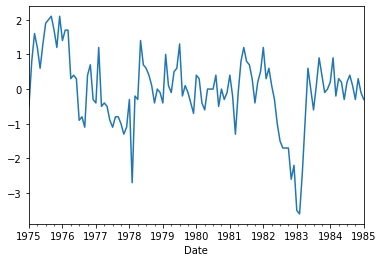

In [39]:
# your code here
subset.plot()

**3. Explore what `rolling()` method is**

* What does this method return?

We can do a variety of things with the rolling() function. The rolling() method itself will only return a Rolling object, we have to use an additional method to denote what computation we want:

In [40]:
roll_mean = subset.rolling(12).mean() # here I want to compute a rolling mean over a 12 point rolling window
# note that as the data points are recorded monthly, our window represents a year.
roll_mean

Date
1975-01-01         NaN
1975-02-01         NaN
1975-03-01         NaN
1975-04-01         NaN
1975-05-01         NaN
                ...   
1984-09-01    0.175000
1984-10-01    0.116667
1984-11-01    0.150000
1984-12-01    0.141667
1985-01-01    0.100000
Freq: MS, Name: SOI, Length: 121, dtype: float64

**4. Plot the original series and the smoothed series**

Now we can plot the rolled mean over the original subset:

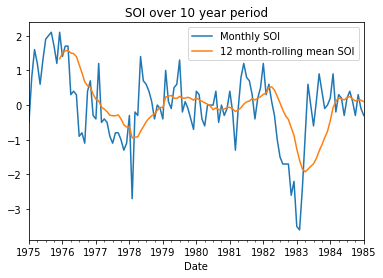

In [41]:
# your code here
subset.plot(label = 'Monthly SOI')
roll_mean.plot(label = '12 month-rolling mean SOI')
plt.title('SOI over 10 year period')
plt.legend()